# K-Nearest Neighbors

The *k-nearest neighbors* (*knn*) classification method predicts the *class* of a sample *x_new*, as follows:
1. Calculate the distance between *x_new* and each training sample (for each training sample, its features and classe are known)
1. Find the *k* nearest neighbors
1. Assign *x_new* to the class that occurs most frequently among the *k* nearest neighbors

In this classifier, _k_ is a *hyperparameter*, which is a parameter of the classifier that must be assigned by the user. 

Typically, odd values of _k_ are considered in order to break ties.

We will use *scikit-learn* for classification and for loading sample datasets. We will start by loading the *iris* dataset, a 'famous' dataset, widely used to test classification methods. The iris dataset contains measurements for 3 species of the iris flower.

## Loading and understanding the data


In [1]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Features and target values

- The *data* contains the *features* (the _X_ values used for making predictions). 
- The *target* contains the class values (the labels or categories for each sample of *X*)
- Both are stored as a *numpy* array, which is a collection of elements of the same type. 
    - if an array has one dimension, you can think of it as a list of values
    - if an array has two dimensions, you can think of it as a table of values, with rows and columns
    - arrays can have more than two dimensions
    
By convention, we use uppercase letters (e.g., *X*), to indicate a matrix (a table/array with rows and columns) and lowercase letters (e.g., *y*) to indicate a vector (an array with 1 dimension).

In [2]:
X = iris.data
y = iris.target

The *shape* attribute of a *numpy* array returns the number of elements in each dimension. *X* has 150 rows and 4 columns:

In [3]:
X.shape

(150, 4)

In [4]:
#capital letter indicates tables
#lower case letters indicates columns

*Y* has 150 rows:

In [5]:
y.shape

(150,)

For *numpy* arrays with 1 dimension, such as *y*, list slicing rules apply. For *numpy* arrays with 2 dimensions, such as *X*, we can access elements using 

```python
X[row_slice, column_slice]
```
Use the cell below to view X and y:

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
X[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [8]:
X[:2,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [9]:
X[:2,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
y[:3]

array([0, 0, 0])

### Feature and target names

Labels for the data are described in the following properties of the *iris* object:
- *feature_names*:  the column names of the *data* which describe the features
- *target_names*: labels corresonding to the integer values of the *target* 

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

For clarity, let's make a data frame with labeled columns

In [14]:
import pandas as pd
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


So that our understanding of the data is clear, let's add the target to the data frame. This is straightforward, because we can treat a data frame as a dictionary where the *keys* are the columns. We now add a column the same way we add a *key:value* pair to a dictionary, where the *value* is a list. 

In [15]:
iris_df['species'] = y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
iris_df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

## Visualizing the data 

We will use the *seaborn* module to generate a scatterplot of the data. A scatterplot is a plot of *x-* and *y-* values.
- the *x* values are the sepal length (the first column of _X_, which has index 0), 
- the *y* values are the sepal width (the 2nd column of _X_, which has index 1)

A *hue* can be specified to color the points, which will automatically add a legend.

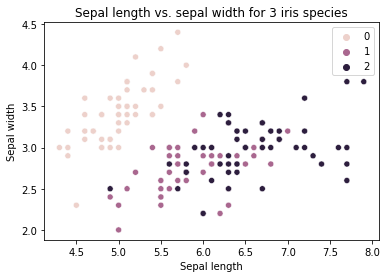

In [17]:
import seaborn as sns
s = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
s.set(xlabel = 'Sepal length', ylabel = 'Sepal width', title = 'Sepal length vs. sepal width for 3 iris species')
None

## K-nearest neighbors

Scikit-learn provides a simple framework for working with classifiers (which *scikit-learn* calls *estimators*), that involves 3 basic steps:

1. Create an estimator or *model*, such as a *KNeighborsClassifier*
1. Train the model using *model.train()*
1. Make predictions using *model.predict()*

### Create a KNN classifier

Note that you need to specify the value of the hyperparameter here. We use *k = 3*.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

### Train the classifier

In general this step has the form

```python
model.fit(X_train,y_train)
```

where 
- *model* is a model such as one obtained by *KNeighborsClassifier*
- *X_train* is an array of features for the training data, with rows corresponding to samples and columns corresponding to features
- *y_ train* is an array of class labels corresponding to each row of *X_train*

Here we fit the model using the complete dataset, using *X* and *y*. Below, we will see how to split the data into separate training and testing datasets.

In [19]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

### Use the classifier to make predictions

Make predictions using

```python
model.predict(xnew)
```
where 
*xnew* is a 2-dimensional array that contains the features for the new samples.

In the example below, we are predicting the species for a flower with the following measurements:
- sepal length: 6 cm
- sepal widht: 2 cm
- petal length: 4.9 cm
- petal width: 1.5 cm

This flower is predicted to have a value of 1 (*versicolor*)

In [20]:
import numpy as np
xnew = np.array(  [  [6, 2, 4.9, 1.5] ] )

# make the prediction
knn.predict(xnew)

array([1])

## Using training and testing datasets

When evaluating a model, it is critical that you have both *training* data and *testing* data. The training and testing data sets should be independent -- we want to evaluate how well a classifier performs on data that is has not seen previously. If a testing data set is not used, we will not know if the classifier is *overfitting* the data. Overfitting occurs when a classifier works really well on the training dataset but performs poorly on new data.

Scikit-learn makes it easy to split a single data set into a training and testing sets, by providing the function

```python
train_test_split(X,y, test_size, random_state, stratify)
```

where

- *X* is a matrix containing the feature data
- *y* is the corresponding matrix containing the class labels
- *test_size* is the proportion of data to reserve for testing
- *random_state* is the random number seed; set this so results will be reproducible
- *stratify* is a list of values to stratify by (the corresponding values will be balanced in the training and testing datasets)

The function returns a tuple of the form
```python
(X_train, X_test, y_train, y_test)
```
that contains the training and testing data for *X* and _y_.

Note that we *stratify* by the class label, to ensure that our datasets are balanced.

If we did not do this, then it is possible by chance for the training dataset to have few target values of a certain type, in which case the classifier would likely do a poor job predicting observations that belong to that class.

### Split the data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)

In [22]:
#test_size = how much youre partitioning your data
#random_state = same thing as seed
#we just assigned values to training and testing data
#stratify = making sure that the target variables and predictor variables  are evenly split between the paritioned data
#prevents a bad ratio in target variables... ex: splitting the data : 90% males, 10% females

We want our data to be balanced with respect to the classes. For example, if there were very few *setosa* samples in the training set, the classifier would probably not do well on these in the test dataset. In this case the dataset is balanced (50 observations for each species), and the random sampling results in test and and training sets that are relatively balanced, as seen below:

In [23]:
# user a Counter to see how many of each class we have in the training dataset
from collections import Counter
print('Balance of training set: ', Counter(y_train))
print('Balance of testing set: ', Counter(y_test))

Balance of training set:  Counter({0: 34, 1: 33, 2: 33})
Balance of testing set:  Counter({1: 17, 2: 17, 0: 16})


In [24]:
#Shows us the data split (its plit in 3rds)

### Fit the model

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Make predictions in the *test* dataset

In [26]:
pred = knn.predict(X_test)

In [42]:
pred

array([1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 2, 1, 0, 0])

### Evaluate the results by generating a *classification report*  which calculates various performance measures

Using *scikit-learn*, we can generate a *classification report* that contains commonly used performance measures

The *classification_report* function takes the true classes from the test data, the predicted values, and optionally the target names. The columns are defined below:

- precision: The proportion of predicted values that are classified correctly
- recall: The proportion of values for a class that have been classified correctly
- F1 score: the harmonic mean of precision and recall
- support: the number of samples for each group

In [30]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, target_names = iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        17
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
#support = number of samples
#f1-score: the mean of precision and recall

In [29]:
#100% of all setosa where correctly identified
#94% of versicolor where correctly identified

#100% of the predicted variables in setosa where correctly classified
#100 of the predicted variables in setosa where correctly classified
#94% of the predicted variables of  virginica are correct

In [ ]:
#in terms of covid: if the precision is 100%, the test correctly identifies when you have covid
# in terms of covid: if the recall is %

## Evaluate the results by looking at the *confusion matrix*

A *confusion matrix* is a matrix that shows how the observations in each row (each class) were classified (corresponding to each column). As the name implies, confusion matrices are useful for identifying areas where the classifier may be "confused" (i.e., where it consistently misclassifies a particular category)

In [31]:
#its kind of the same as what we did in MAT 342 for checking to see how our model was

In [32]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = y_test, y_pred = pred)
confusion

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 17]])

Let's create a data frame so that we can label the rows and columns 

In [33]:
import pandas as pd
confusion_df = pd.DataFrame(confusion, columns=iris.target_names, index=iris.target_names)
confusion_df

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,16,1
virginica,0,0,17


We can visualize the heatmap using the seaborn *heatmap* function

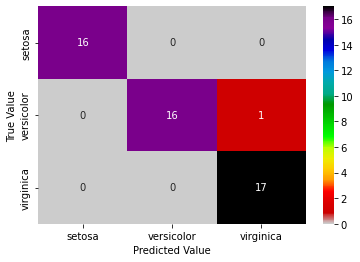

In [46]:
import matplotlib.pyplot as plt
sns.heatmap(confusion_df, annot = True, cmap = 'nipy_spectral_r')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
None